## Car Price Assignment

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

### Step 1: Reading and Understanding the Data

In [442]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [443]:
df_CarDetails = pd.read_csv("G:/UpGrad/ML-1/LR-1/Multiple LR/Assignment/CarPrice_Assignment.csv")
df_CarDetails.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [444]:
df_CarDetails.shape

(205, 26)

In [445]:
df_CarDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [446]:
df_CarDetails.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Step 2: Visualising the Data

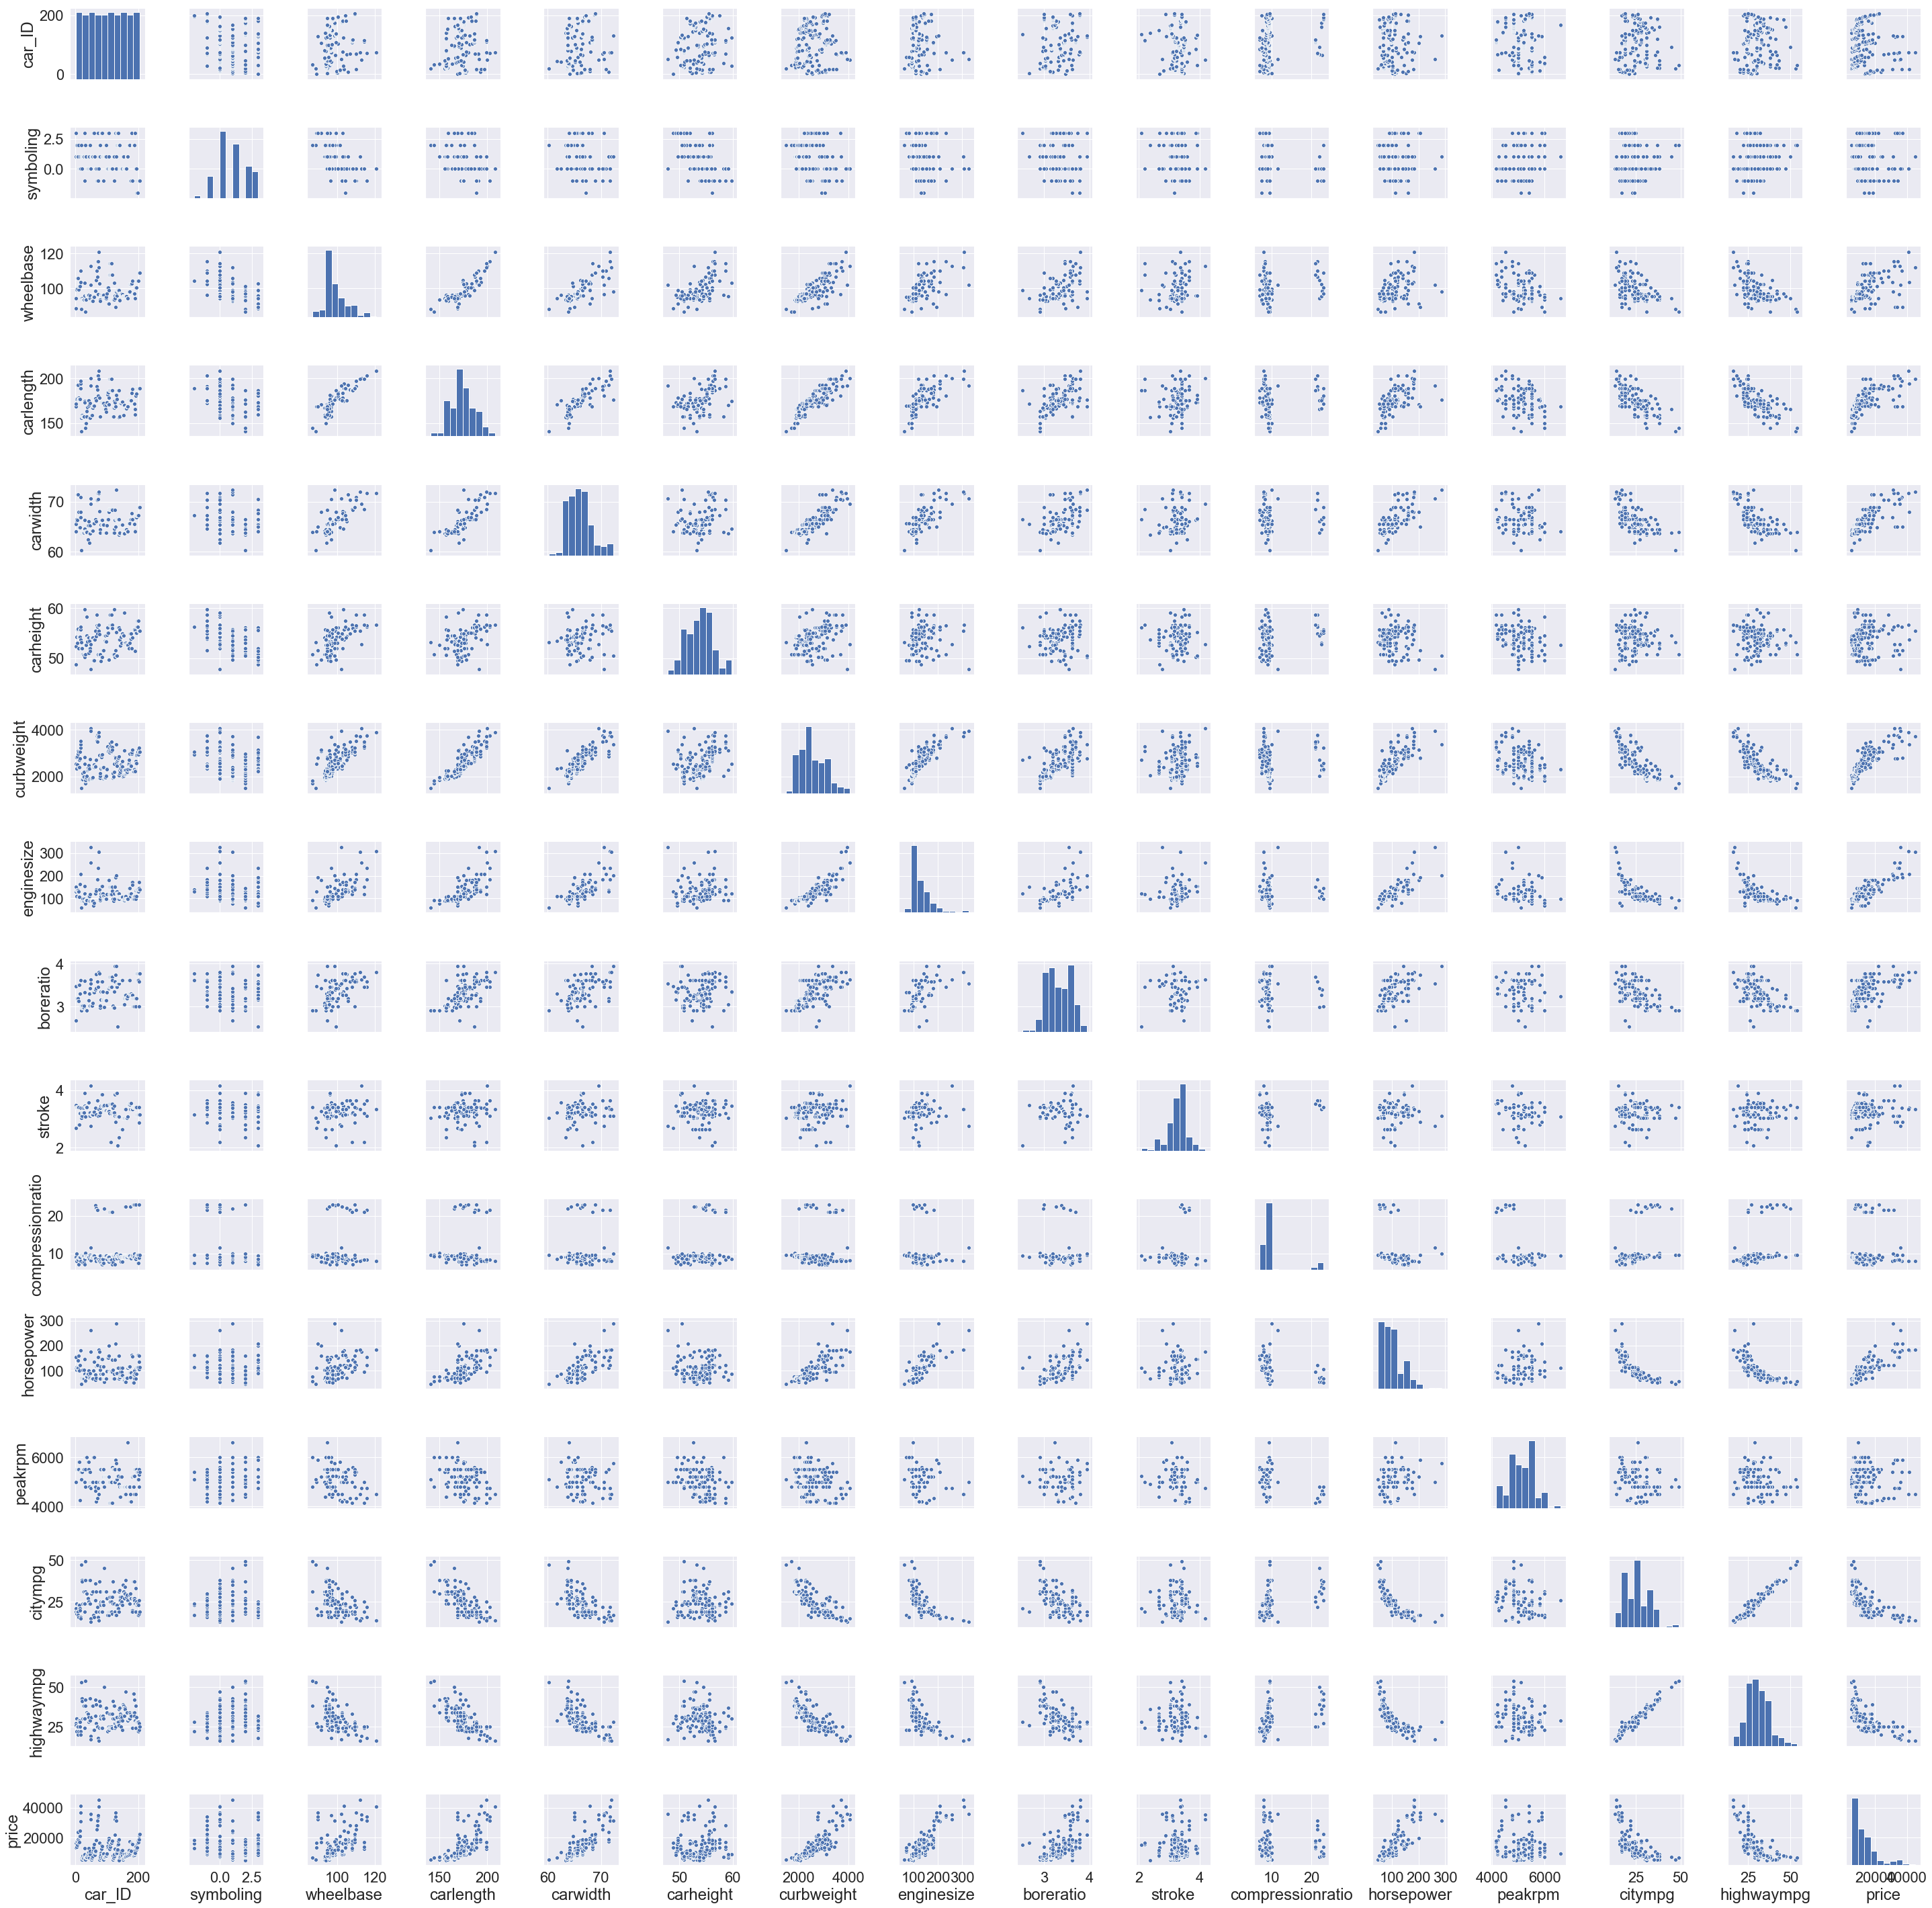

In [447]:
# Visualling the numeric variable from dataset
sns.set(font_scale=2)
sns.pairplot(df_CarDetails)
plt.show()

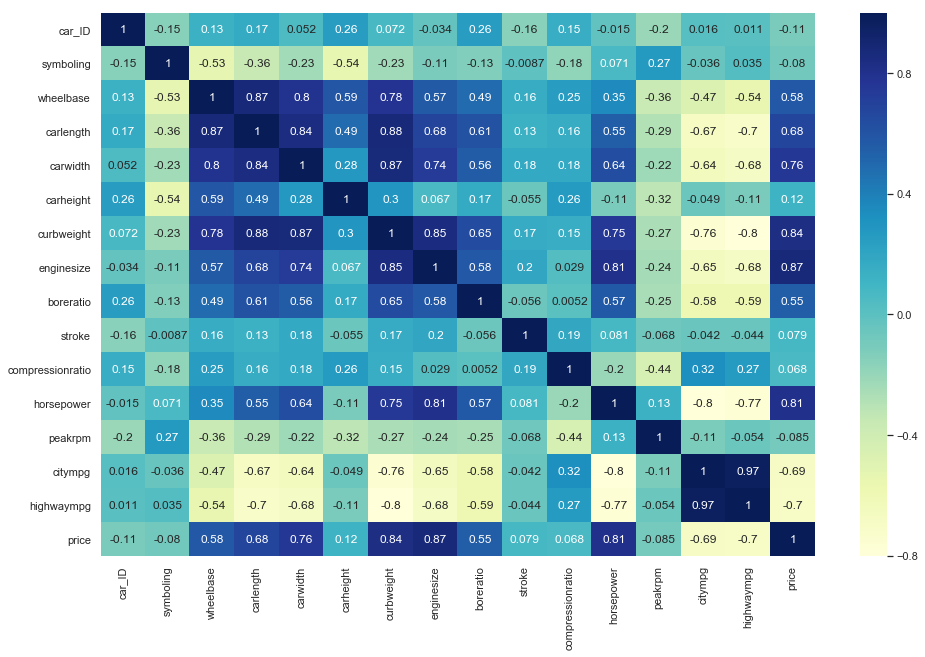

In [448]:
sns.set(font_scale=1)
plt.figure(figsize = (16,10))
sns.heatmap(df_CarDetails.corr(), annot = True, cmap= "YlGnBu")
plt.show()

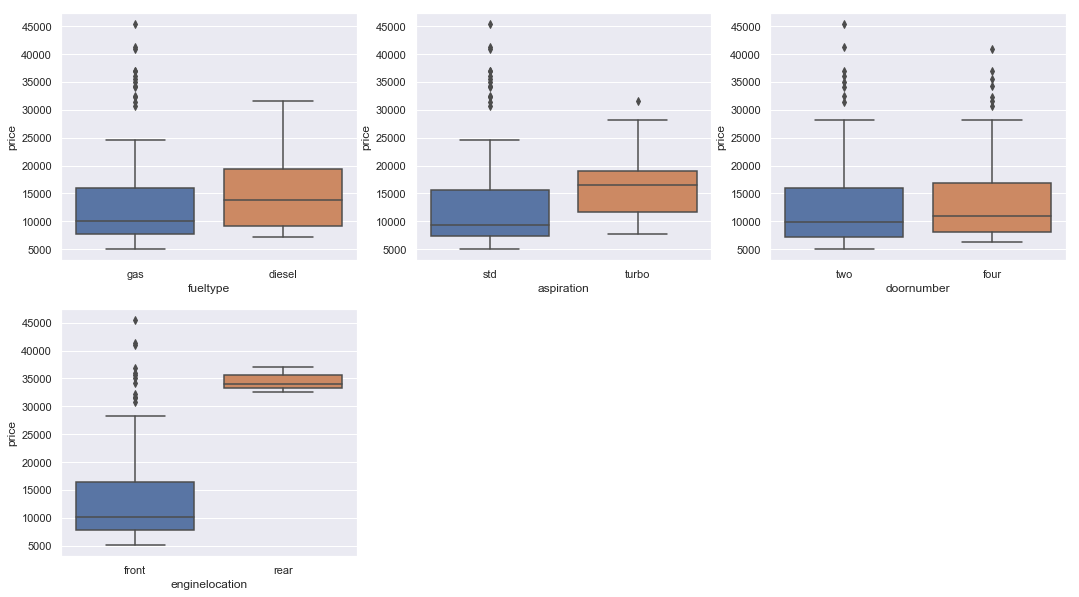

In [449]:
# Visualling the categorical variable from dataset
plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
sns.boxplot(x='fueltype', y='price', data = df_CarDetails)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df_CarDetails)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = df_CarDetails)
plt.subplot(2,3,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = df_CarDetails)
plt.show()

### Step 3: Data Preparation

#### Data Cleaning

- From above plot we can notice that, there is a high corelation between carlength, curbweight,  wheelbase, carwidth
- and also highwaympg and citympg has a high corelation
- CarID also just the serial number
- so we need to drop them 

In [450]:
df_CarDetails.drop(['carwidth', 'curbweight',  'wheelbase', 'highwaympg', 'car_ID'], axis = 1, inplace = True)
df_CarDetails.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,171.2,52.4,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,176.6,54.3,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,176.6,54.3,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


- There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'.
- For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [451]:
df_CarDetails['CarName'] = df_CarDetails['CarName'].str.replace('-',' ')
df_CarDetails.CarName.unique()

array(['alfa romero giulia', 'alfa romero stelvio',
       'alfa romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU X', 'isuzu D Max ',
       'isuzu D Max V Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx 4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx 7 gs',
       'mazda glc 

In [452]:
df_CarDetails['CarName'] = df_CarDetails.CarName.map(lambda x: x.split(" ",1)[0])

# As there is some redundant data in column CarName, so we need to fix it
df_CarDetails['CarName'] = df_CarDetails['CarName'].str.replace('vw', 'volkswagen')
df_CarDetails['CarName'] = df_CarDetails['CarName'].str.replace('vokswagen', 'volkswagen')
df_CarDetails['CarName'] = df_CarDetails['CarName'].str.replace('toyouta', 'toyota')
df_CarDetails['CarName'] = df_CarDetails['CarName'].str.replace('porcshce', 'porsche')
df_CarDetails['CarName'] = df_CarDetails['CarName'].str.replace('maxda', 'mazda')
df_CarDetails['CarName'] = df_CarDetails['CarName'].str.replace('nissan', 'Nissan')

df_CarDetails.CarName.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'Nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

- In our dataset there are many columns with values as two categorical values like fueltype, aspiration, doornumber and enginelocation.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [453]:
df_CarDetails.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [454]:
df_CarDetails.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [455]:
df_CarDetails.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [456]:
df_CarDetails.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

- So for fueltype column
- Converting gas = 1 and diesel = 0

- for aspiration column
- Converting std = 1 and turbo = 0

- for doornumber column
- Converting two = 1 and four = 0

- for enginelocation column
- Converting front = 1 and rear = 0

In [457]:
df_CarDetails['fueltype'] = df_CarDetails['fueltype'].map({'gas' : 1, 'diesel' : 0})
df_CarDetails['aspiration'] = df_CarDetails['aspiration'].map({'std' : 1, 'turbo' : 0})
df_CarDetails['doornumber'] = df_CarDetails['doornumber'].map({'two' : 1, 'four' : 0})
df_CarDetails['enginelocation'] = df_CarDetails['enginelocation'].map({'front' : 1, 'rear' : 0})

In [458]:
df_CarDetails.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,alfa,1,1,1,convertible,rwd,1,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,3,alfa,1,1,1,convertible,rwd,1,168.8,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,1,alfa,1,1,1,hatchback,rwd,1,171.2,52.4,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,2,audi,1,1,0,sedan,fwd,1,176.6,54.3,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,2,audi,1,1,0,sedan,4wd,1,176.6,54.3,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


### Dummy Variable


- As we can se we have few categorial fields like carbody, drivewheel, fuelsystem, cylinderNumber, engineType, CarName has more than two levels. We need to convert these levels into integer as well. 

- For this, we will use something called dummy variables.

In [459]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'carbody_dumVal'
carbody_dumVal = pd.get_dummies(df_CarDetails['carbody'])

# Add the results to the original housing dataframe 
df_CarDetails = pd.concat([df_CarDetails, carbody_dumVal], axis = 1)

# Drop 'carbody' as we have created the dummies for it
df_CarDetails.drop(['carbody'], axis = 1, inplace = True)

df_CarDetails.head()

,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,carlength,carheight,enginetype,...,compressionratio,horsepower,peakrpm,citympg,price,convertible,hardtop,hatchback,sedan,wagon
0,3,alfa,1,1,1,rwd,1,168.8,48.8,dohc,...,9.0,111,5000,21,13495.0,1,0,0,0,0
1,3,alfa,1,1,1,rwd,1,168.8,48.8,dohc,...,9.0,111,5000,21,16500.0,1,0,0,0,0
2,1,alfa,1,1,1,rwd,1,171.2,52.4,ohcv,...,9.0,154,5000,19,16500.0,0,0,1,0,0
3,2,audi,1,1,0,fwd,1,176.6,54.3,ohc,...,10.0,102,5500,24,13950.0,0,0,0,1,0
4,2,audi,1,1,0,4wd,1,176.6,54.3,ohc,...,8.0,115,5500,18,17450.0,0,0,0,1,0


In [460]:
# Get the dummy variables for the feature 'drivewheel' and store it in a new variable - 'drivewheel_dumVal'
drivewheel_dumVal = pd.get_dummies(df_CarDetails['drivewheel'])

# Add the results to the original housing dataframe 
df_CarDetails = pd.concat([df_CarDetails, drivewheel_dumVal], axis = 1)

# Drop 'drivewheel' as we have created the dummies for it
df_CarDetails.drop(['drivewheel'], axis = 1, inplace = True)

df_CarDetails.head()

,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginetype,cylindernumber,...,citympg,price,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd
0,3,alfa,1,1,1,1,168.8,48.8,dohc,four,...,21,13495.0,1,0,0,0,0,0,0,1
1,3,alfa,1,1,1,1,168.8,48.8,dohc,four,...,21,16500.0,1,0,0,0,0,0,0,1
2,1,alfa,1,1,1,1,171.2,52.4,ohcv,six,...,19,16500.0,0,0,1,0,0,0,0,1
3,2,audi,1,1,0,1,176.6,54.3,ohc,four,...,24,13950.0,0,0,0,1,0,0,1,0
4,2,audi,1,1,0,1,176.6,54.3,ohc,five,...,18,17450.0,0,0,0,1,0,1,0,0


In [461]:
# Get the dummy variables for the feature 'fuelsystem' and store it in a new variable - 'fuelsystem_dumVal'
fuelsystem_dumVal = pd.get_dummies(df_CarDetails['fuelsystem'])

# Add the results to the original housing dataframe 
df_CarDetails = pd.concat([df_CarDetails, fuelsystem_dumVal], axis = 1)

# Drop 'fuelsystem' as we have created the dummies for it
df_CarDetails.drop(['fuelsystem'], axis = 1, inplace = True)

df_CarDetails.head()

,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginetype,cylindernumber,...,fwd,rwd,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,alfa,1,1,1,1,168.8,48.8,dohc,four,...,0,1,0,0,0,0,0,1,0,0
1,3,alfa,1,1,1,1,168.8,48.8,dohc,four,...,0,1,0,0,0,0,0,1,0,0
2,1,alfa,1,1,1,1,171.2,52.4,ohcv,six,...,0,1,0,0,0,0,0,1,0,0
3,2,audi,1,1,0,1,176.6,54.3,ohc,four,...,1,0,0,0,0,0,0,1,0,0
4,2,audi,1,1,0,1,176.6,54.3,ohc,five,...,0,0,0,0,0,0,0,1,0,0


In [462]:
# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'enginetype_dumVal'
enginetype_dumVal = pd.get_dummies(df_CarDetails['enginetype'])

# Add the results to the original housing dataframe 
df_CarDetails = pd.concat([df_CarDetails, enginetype_dumVal], axis = 1)

# Drop 'enginetype' as we have created the dummies for it
df_CarDetails.drop(['enginetype'], axis = 1, inplace = True)

df_CarDetails.head()

,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,...,mpfi,spdi,spfi,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,alfa,1,1,1,1,168.8,48.8,four,130,...,1,0,0,1,0,0,0,0,0,0
1,3,alfa,1,1,1,1,168.8,48.8,four,130,...,1,0,0,1,0,0,0,0,0,0
2,1,alfa,1,1,1,1,171.2,52.4,six,152,...,1,0,0,0,0,0,0,0,1,0
3,2,audi,1,1,0,1,176.6,54.3,four,109,...,1,0,0,0,0,0,1,0,0,0
4,2,audi,1,1,0,1,176.6,54.3,five,136,...,1,0,0,0,0,0,1,0,0,0


In [463]:
# Get the dummy variables for the feature 'cylindernumber' and store it in a new variable - 'cylindernumber_dumVal'
cylindernumber_dumVal = pd.get_dummies(df_CarDetails['cylindernumber'])

# Add the results to the original housing dataframe 
df_CarDetails = pd.concat([df_CarDetails, cylindernumber_dumVal], axis = 1)

# Drop 'cylindernumber' as we have created the dummies for it
df_CarDetails.drop(['cylindernumber'], axis = 1, inplace = True)

df_CarDetails.head()

,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,...,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two
0,3,alfa,1,1,1,1,168.8,48.8,130,3.47,...,0,0,0,0,0,1,0,0,0,0
1,3,alfa,1,1,1,1,168.8,48.8,130,3.47,...,0,0,0,0,0,1,0,0,0,0
2,1,alfa,1,1,1,1,171.2,52.4,152,2.68,...,0,1,0,0,0,0,1,0,0,0
3,2,audi,1,1,0,1,176.6,54.3,109,3.19,...,0,0,0,0,0,1,0,0,0,0
4,2,audi,1,1,0,1,176.6,54.3,136,3.19,...,0,0,0,0,1,0,0,0,0,0


In [464]:
# Get the dummy variables for the feature 'CarName' and store it in a new variable - 'CarName_dumVal'
CarName_dumVal = pd.get_dummies(df_CarDetails['CarName'])

# Add the results to the original housing dataframe 
df_CarDetails = pd.concat([df_CarDetails, CarName_dumVal], axis = 1)

# Drop 'CarName' as we have created the dummies for it
df_CarDetails.drop(['CarName'], axis = 1, inplace = True)

df_CarDetails.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,mitsubishi,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,1,1,1,1,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,1,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,171.2,52.4,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,0,1,176.6,54.3,109,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,0,1,176.6,54.3,136,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [465]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_CarDetails, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the variable

- Using Max-Min(normalisation) method
- normalisation : (x - xmin)/(xmax - xmin)

In [466]:
# 1. Instantiate the object
scaler = MinMaxScaler()
num_vars = ['symboling', 'carlength', 'carheight', 
         'enginesize', 'boreratio', 'stroke', 'compressionratio',
            'horsepower', 'peakrpm', 'citympg', 'price']

# 2. Fit on Data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,symboling,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
122,0.6,0.426016,0.265487,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.068818
125,1.0,0.452033,0.212389,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.466890
166,0.6,0.448780,0.424779,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.122110
1,1.0,0.450407,0.088496,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.314446
199,0.2,0.775610,0.858407,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.382131


In [467]:
df_CarDetails.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,mitsubishi,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.819512,0.439024,0.985366,174.049268,53.724878,126.907317,3.329756,3.255415,...,0.063415,0.053659,0.034146,0.024390,0.009756,0.029268,0.058537,0.156098,0.058537,0.053659
std,1.245307,0.297446,0.385535,0.497483,0.120377,12.337289,2.443522,41.642693,0.270844,0.313597,...,0.244304,0.225894,0.182050,0.154635,0.098531,0.168970,0.235330,0.363836,0.235330,0.225894
min,-2.000000,0.000000,0.000000,0.000000,0.000000,141.100000,47.800000,61.000000,2.540000,2.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,166.300000,52.000000,97.000000,3.150000,3.110000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,173.200000,54.100000,120.000000,3.310000,3.290000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000,1.000000,1.000000,183.100000,55.500000,141.000000,3.580000,3.410000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,208.100000,59.800000,326.000000,3.940000,4.170000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [468]:
# X_train, y_train
y_train = df_train.pop('price')
X_train = df_train

In [469]:
X_train_sm = sm.add_constant(X_train)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     47.44
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.05e-47
Time:                        01:56:57   Log-Likelihood:                 258.33
No. Observations:                 143   AIC:                            -408.7
Df Residuals:                      89   BIC:                            -248.7
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0016      0.076     -0.021      0.984      -0.153       0.150
symboling           -0.0276      0.041     -0.677      0.500      -0.109       0.053
fueltype            -0.0141      0.084     -0.169      0.866      -0.180       0.152
aspiration          -0.1104      0.031     -3.557      0.001      -0.172      -0.049
doornumber          -0.0240      0.017     -1.424      0.158      -0.058       0.009
enginelocation       0.0057      0.059      0.097      0.923      -0.112       0.123
carlength            0.1930      0.081      2.375      0.020       0.032       0.355
carheight           -0.1146      0.055     -2.073      0.041      -0.224      -0.005
enginesize           2.7049      0.492      5.494      0.000       1.727       3.683
boreratio           -0.7952      0.185     -4.296      0.000      -1.163      -0.427
stroke              -0.2660      0.091     -2.913      0.005      -0.447      -0.085
compressionratio    -0.0068      0.294     -0.023      0.981      -0.590       0.577
horsepower          -0.0850      0.224     -0.379      0.705      -0.530       0.360
peakrpm              0.1921      0.057      3.367      0.001       0.079       0.305
citympg              0.0211      0.088      0.241      0.810      -0.153       0.195
convertible          0.0880      0.040      2.216      0.029       0.009       0.167
hardtop             -0.0185      0.039     -0.480      0.632      -0.095       0.058
hatchback           -0.0218      0.022     -0.992      0.324      -0.065       0.022
sedan               -0.0307      0.021     -1.437      0.154      -0.073       0.012
wagon               -0.0186      0.027     -0.699      0.486      -0.071       0.034
4wd                 -0.0066      0.029     -0.229      0.819      -0.064       0.051
fwd                 -0.0116      0.028     -0.413      0.681      -0.068       0.044
rwd                  0.0167      0.036      0.468      0.641      -0.054       0.088
1bbl                -0.0338      0.057     -0.597      0.552      -0.146       0.079
2bbl                 0.0306      0.022      1.383      0.170      -0.013       0.075
4bbl                 0.0019      0.057      0.034      0.973      -0.111       0.115
idi                  0.0126      0.148      0.085      0.933      -0.282       0.307
mfi              -4.974e-15   1.01e-15     -4.949      0.000   -6.97e-15   -2.98e-15
mpfi                 0.0092      0.027      0.345      0.731      -0.044       0.062
spdi                -0.0220      0.039     -0.560      0.577      -0.100       0.056
spfi             -7.316e-15   1.66e-15     -4.396      0.000   -1.06e-14   -4.01e-15
dohc                -0.2013      0.050     -4.005      0.000      -0.301      -0.101
dohcv                0.1895      0.148      1.279      0.204      -0.105       0.484
l                    0.

### Checking VIF

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [470]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
33,ohc,inf
49,chevrolet,inf
36,rotor,inf
37,eight,inf
38,five,inf
39,four,inf
40,six,inf
41,three,inf
42,twelve,inf
43,two,inf


- We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `compressionratio` as it has a very high p-value of `0.981`. Let's go ahead and drop this variables

In [471]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('compressionratio', axis= 1)

In [472]:
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     48.90
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.91e-48
Time:                        01:56:58   Log-Likelihood:                 258.33
No. Observations:                 143   AIC:                            -410.7
Df Residuals:                      90   BIC:                            -253.6
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0031      0.041     -0.076      0.940      -0.084       0.077
symboling         -0.0276      0.041     -0.681      0.498      -0.108       0.053
fueltype          -0.0123      0.023     -0.535      0.594      -0.058       0.033
aspiration        -0.1105      0.031     -3.611      0.001      -0.171      -0.050
doornumber        -0.0240      0.017     -1.438      0.154      -0.057       0.009
enginelocation     0.0051      0.053      0.097      0.923      -0.100       0.110
carlength          0.1925      0.077      2.486      0.015       0.039       0.346
carheight         -0.1145      0.055     -2.096      0.039      -0.223      -0.006
enginesize         2.7048      0.490      5.524      0.000       1.732       3.678
boreratio         -0.7952      0.184     -4.321      0.000      -1.161      -0.430
stroke            -0.2661      0.091     -2.935      0.004      -0.446      -0.086
horsepower        -0.0832      0.209     -0.399      0.691      -0.498       0.331
peakrpm            0.1919      0.056      3.441      0.001       0.081       0.303
citympg            0.0205      0.083      0.247      0.806      -0.145       0.185
convertible        0.0877      0.038      2.305      0.023       0.012       0.163
hardtop           -0.0190      0.033     -0.579      0.564      -0.084       0.046
hatchback         -0.0221      0.018     -1.233      0.221      -0.058       0.013
sedan             -0.0309      0.018     -1.681      0.096      -0.068       0.006
wagon             -0.0188      0.024     -0.782      0.436      -0.067       0.029
4wd               -0.0070      0.023     -0.306      0.761      -0.053       0.039
fwd               -0.0121      0.019     -0.649      0.518      -0.049       0.025
rwd                0.0161      0.024      0.670      0.505      -0.032       0.064
1bbl              -0.0334      0.053     -0.625      0.533      -0.140       0.073
2bbl               0.0308      0.020      1.566      0.121      -0.008       0.070
4bbl               0.0025      0.052      0.048      0.962      -0.100       0.105
idi                0.0092      0.031      0.294      0.769      -0.053       0.071
mfi             8.264e-15   1.63e-15      5.071      0.000    5.03e-15    1.15e-14
mpfi               0.0094      0.024      0.393      0.695      -0.038       0.057
spdi              -0.0216      0.034     -0.627      0.532      -0.090       0.047
spfi           -8.683e-15   1.67e-15     -5.194      0.000    -1.2e-14   -5.36e-15
dohc              -0.2015      0.050     -4.053      0.000      -0.300      -0.103
dohcv              0.1883      0.138      1.360      0.177      -0.087       0.463
l                  0.0945      0.032      2.913      0.005       0.030       0.159
ohc               -0.1732      0.070     -2.486      0.015      -0.312      -0.035
ohcf        

In [473]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
33,ohcf,inf
48,chevrolet,inf
35,rotor,inf
36,eight,inf
37,five,inf
38,four,inf
39,six,inf
40,three,inf
41,twelve,inf
42,two,inf


In [474]:
X = X.drop('enginelocation', axis= 1)

X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     48.90
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.91e-48
Time:                        01:56:59   Log-Likelihood:                 258.33
No. Observations:                 143   AIC:                            -410.7
Df Residuals:                      90   BIC:                            -253.6
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0012      0.037     -0.031      0.975      -0.075       0.073
symboling      -0.0276      0.041     -0.681      0.498      -0.108       0.053
fueltype       -0.0114      0.022     -0.518      0.606      -0.055       0.032
aspiration     -0.1105      0.031     -3.611      0.001      -0.171      -0.050
doornumber     -0.0240      0.017     -1.438      0.154      -0.057       0.009
carlength       0.1925      0.077      2.486      0.015       0.039       0.346
carheight      -0.1145      0.055     -2.096      0.039      -0.223      -0.006
enginesize      2.7048      0.490      5.524      0.000       1.732       3.678
boreratio      -0.7952      0.184     -4.321      0.000      -1.161      -0.430
stroke         -0.2661      0.091     -2.935      0.004      -0.446      -0.086
horsepower     -0.0832      0.209     -0.399      0.691      -0.498       0.331
peakrpm         0.1919      0.056      3.441      0.001       0.081       0.303
citympg         0.0205      0.083      0.247      0.806      -0.145       0.185
convertible     0.0881      0.038      2.325      0.022       0.013       0.163
hardtop        -0.0186      0.034     -0.542      0.589      -0.087       0.050
hatchback      -0.0217      0.016     -1.322      0.189      -0.054       0.011
sedan          -0.0306      0.017     -1.776      0.079      -0.065       0.004
wagon          -0.0184      0.023     -0.798      0.427      -0.064       0.027
4wd            -0.0064      0.022     -0.290      0.772      -0.050       0.037
fwd            -0.0115      0.018     -0.630      0.530      -0.048       0.025
rwd             0.0167      0.024      0.711      0.479      -0.030       0.063
1bbl           -0.0332      0.053     -0.623      0.535      -0.139       0.073
2bbl            0.0310      0.020      1.578      0.118      -0.008       0.070
4bbl            0.0026      0.052      0.051      0.959      -0.100       0.105
idi             0.0103      0.030      0.343      0.732      -0.049       0.070
mfi         -4.424e-15   1.05e-15     -4.199      0.000   -6.52e-15   -2.33e-15
mpfi            0.0096      0.024      0.401      0.689      -0.038       0.057
spdi           -0.0214      0.034     -0.622      0.536      -0.090       0.047
spfi         3.986e-15   8.18e-16      4.876      0.000    2.36e-15    5.61e-15
dohc           -0.2003      0.050     -4.044      0.000      -0.299      -0.102
dohcv           0.1895      0.140      1.349      0.181      -0.089       0.468
l               0.0952      0.035      2.709      0.008       0.025       0.165
ohc            -0.1721      0.068     -2.516      0.014      -0.308      -0.036
ohcf           -0.0266      0.079     -0.338      0.736      -0.183       0.130
ohcv           -0.2022      0.051     -3.944      0.000      -0.304      -0.100
rotor           0.3153      0.062      5.10

In [475]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
32,ohcf,inf
33,ohcv,inf
35,eight,inf
36,five,inf
37,four,inf
38,six,inf
39,three,inf
40,twelve,inf
41,two,inf
42,Nissan,inf


In [476]:
# Drop mercury,spfi and mfi columns because it has NAN values.
X = X.drop('mfi', axis= 1)
X = X.drop('spfi', axis= 1)
X = X.drop('mercury', axis= 1)

X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     48.90
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.91e-48
Time:                        01:57:00   Log-Likelihood:                 258.33
No. Observations:                 143   AIC:                            -410.7
Df Residuals:                      90   BIC:                            -253.6
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0012      0.037     -0.031      0.975      -0.075       0.073
symboling      -0.0276      0.041     -0.681      0.498      -0.108       0.053
fueltype       -0.0114      0.022     -0.518      0.606      -0.055       0.032
aspiration     -0.1105      0.031     -3.611      0.001      -0.171      -0.050
doornumber     -0.0240      0.017     -1.438      0.154      -0.057       0.009
carlength       0.1925      0.077      2.486      0.015       0.039       0.346
carheight      -0.1145      0.055     -2.096      0.039      -0.223      -0.006
enginesize      2.7048      0.490      5.524      0.000       1.732       3.678
boreratio      -0.7952      0.184     -4.321      0.000      -1.161      -0.430
stroke         -0.2661      0.091     -2.935      0.004      -0.446      -0.086
horsepower     -0.0832      0.209     -0.399      0.691      -0.498       0.331
peakrpm         0.1919      0.056      3.441      0.001       0.081       0.303
citympg         0.0205      0.083      0.247      0.806      -0.145       0.185
convertible     0.0881      0.038      2.325      0.022       0.013       0.163
hardtop        -0.0186      0.034     -0.542      0.589      -0.087       0.050
hatchback      -0.0217      0.016     -1.322      0.189      -0.054       0.011
sedan          -0.0306      0.017     -1.776      0.079      -0.065       0.004
wagon          -0.0184      0.023     -0.798      0.427      -0.064       0.027
4wd            -0.0064      0.022     -0.290      0.772      -0.050       0.037
fwd            -0.0115      0.018     -0.630      0.530      -0.048       0.025
rwd             0.0167      0.024      0.711      0.479      -0.030       0.063
1bbl           -0.0332      0.053     -0.623      0.535      -0.139       0.073
2bbl            0.0310      0.020      1.578      0.118      -0.008       0.070
4bbl            0.0026      0.052      0.051      0.959      -0.100       0.105
idi             0.0103      0.030      0.343      0.732      -0.049       0.070
mpfi            0.0096      0.024      0.401      0.689      -0.038       0.057
spdi           -0.0214      0.034     -0.622      0.536      -0.090       0.047
dohc           -0.2003      0.050     -4.044      0.000      -0.299      -0.102
dohcv           0.1895      0.140      1.349      0.181      -0.089       0.468
l               0.0952      0.035      2.709      0.008       0.025       0.165
ohc            -0.1721      0.068     -2.516      0.014      -0.308      -0.036
ohcf           -0.0266      0.079     -0.338      0.736      -0.183       0.130
ohcv           -0.2022      0.051     -3.944      0.000      -0.304      -0.100
rotor           0.3153      0.062      5.104      0.000       0.193       0.438
eight          -0.2627      0.111     -2.367      0.020      -0.483      -0.042
five            0.1577      0.068      2.32

In [477]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
30,ohcf,inf
31,ohcv,inf
33,eight,inf
34,five,inf
35,four,inf
36,six,inf
37,three,inf
38,twelve,inf
39,two,inf
40,Nissan,inf


In [478]:
X = X.drop('subaru', axis= 1)

X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     48.90
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.91e-48
Time:                        01:57:00   Log-Likelihood:                 258.33
No. Observations:                 143   AIC:                            -410.7
Df Residuals:                      90   BIC:                            -253.6
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0052      0.049     -0.104      0.917      -0.103       0.093
symboling      -0.0276      0.041     -0.681      0.498      -0.108       0.053
fueltype       -0.0132      0.027     -0.490      0.626      -0.067       0.040
aspiration     -0.1105      0.031     -3.611      0.001      -0.171      -0.050
doornumber     -0.0240      0.017     -1.438      0.154      -0.057       0.009
carlength       0.1925      0.077      2.486      0.015       0.039       0.346
carheight      -0.1145      0.055     -2.096      0.039      -0.223      -0.006
enginesize      2.7048      0.490      5.524      0.000       1.732       3.678
boreratio      -0.7952      0.184     -4.321      0.000      -1.161      -0.430
stroke         -0.2661      0.091     -2.935      0.004      -0.446      -0.086
horsepower     -0.0832      0.209     -0.399      0.691      -0.498       0.331
peakrpm         0.1919      0.056      3.441      0.001       0.081       0.303
citympg         0.0205      0.083      0.247      0.806      -0.145       0.185
convertible     0.0873      0.039      2.240      0.028       0.010       0.165
hardtop        -0.0194      0.037     -0.519      0.605      -0.094       0.055
hatchback      -0.0225      0.015     -1.467      0.146      -0.053       0.008
sedan          -0.0314      0.016     -1.902      0.060      -0.064       0.001
wagon          -0.0192      0.022     -0.864      0.390      -0.063       0.025
4wd            -0.0077      0.023     -0.330      0.742      -0.054       0.039
fwd            -0.0128      0.021     -0.598      0.551      -0.055       0.030
rwd             0.0154      0.027      0.577      0.565      -0.038       0.068
1bbl           -0.0336      0.053     -0.631      0.530      -0.139       0.072
2bbl            0.0306      0.020      1.543      0.126      -0.009       0.070
4bbl            0.0023      0.052      0.044      0.965      -0.101       0.106
idi             0.0081      0.034      0.236      0.814      -0.060       0.076
mpfi            0.0093      0.024      0.386      0.701      -0.038       0.057
spdi           -0.0218      0.035     -0.630      0.531      -0.090       0.047
dohc           -0.2015      0.052     -3.839      0.000      -0.306      -0.097
dohcv           0.1883      0.141      1.334      0.186      -0.092       0.469
l               0.0976      0.032      3.021      0.003       0.033       0.162
ohc            -0.1732      0.070     -2.459      0.016      -0.313      -0.033
ohcf           -0.0277      0.069     -0.403      0.688      -0.165       0.109
ohcv           -0.2034      0.053     -3.803      0.000      -0.310      -0.097
rotor           0.3148      0.064      4.907      0.000       0.187       0.442
eight          -0.2627      0.111     -2.366      0.020      -0.483      -0.042
five            0.1577      0.068      2.32

In [479]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
30,ohcf,inf
20,1bbl,inf
23,idi,inf
24,mpfi,inf
25,spdi,inf
26,dohc,inf
27,dohcv,inf
28,l,inf
29,ohc,inf
1,fueltype,inf


In [480]:
X = X.drop('Nissan', axis= 1)

X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     50.41
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           4.08e-49
Time:                        01:57:01   Log-Likelihood:                 258.32
No. Observations:                 143   AIC:                            -412.6
Df Residuals:                      91   BIC:                            -258.6
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0083      0.039     -0.214      0.831      -0.086       0.069
symboling      -0.0274      0.040     -0.681      0.498      -0.107       0.053
fueltype       -0.0147      0.023     -0.640      0.524      -0.060       0.031
aspiration     -0.1106      0.030     -3.636      0.000      -0.171      -0.050
doornumber     -0.0240      0.017     -1.446      0.152      -0.057       0.009
carlength       0.1929      0.077      2.508      0.014       0.040       0.346
carheight      -0.1148      0.054     -2.116      0.037      -0.223      -0.007
enginesize      2.6964      0.480      5.613      0.000       1.742       3.651
boreratio      -0.7911      0.179     -4.423      0.000      -1.146      -0.436
stroke         -0.2657      0.090     -2.949      0.004      -0.445      -0.087
horsepower     -0.0846      0.207     -0.408      0.684      -0.496       0.327
peakrpm         0.1911      0.055      3.475      0.001       0.082       0.300
citympg         0.0200      0.082      0.243      0.809      -0.144       0.184
convertible     0.0865      0.038      2.279      0.025       0.011       0.162
hardtop        -0.0213      0.032     -0.656      0.513      -0.086       0.043
hatchback      -0.0225      0.015     -1.480      0.142      -0.053       0.008
sedan          -0.0316      0.016     -1.938      0.056      -0.064       0.001
wagon          -0.0194      0.022     -0.877      0.383      -0.063       0.025
4wd            -0.0086      0.022     -0.400      0.690      -0.052       0.034
fwd            -0.0140      0.018     -0.765      0.446      -0.050       0.022
rwd             0.0143      0.024      0.585      0.560      -0.034       0.063
1bbl           -0.0337      0.053     -0.636      0.526      -0.139       0.072
2bbl            0.0303      0.019      1.554      0.124      -0.008       0.069
4bbl            0.0017      0.051      0.032      0.974      -0.101       0.104
idi             0.0064      0.030      0.213      0.832      -0.053       0.066
mpfi            0.0091      0.024      0.384      0.702      -0.038       0.056
spdi           -0.0221      0.034     -0.645      0.521      -0.090       0.046
dohc           -0.2038      0.047     -4.300      0.000      -0.298      -0.110
dohcv           0.1878      0.140      1.339      0.184      -0.091       0.467
l               0.0985      0.031      3.183      0.002       0.037       0.160
ohc            -0.1757      0.066     -2.660      0.009      -0.307      -0.044
ohcf           -0.0218      0.039     -0.553      0.581      -0.100       0.057
ohcv           -0.2057      0.048     -4.241      0.000      -0.302      -0.109
rotor           0.3123      0.060      5.248      0.000       0.194       0.431
eight          -0.2606      0.109     -2.400      0.018      -0.476      -0.045
five            0.1574      0.067      2.33

In [481]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,ohc,inf
20,1bbl,inf
23,idi,inf
24,mpfi,inf
25,spdi,inf
26,dohc,inf
27,dohcv,inf
28,l,inf
1,fueltype,inf
30,ohcf,inf


In [482]:
#X = X.drop('bmw', axis = 1)
X = X.drop('4bbl', axis = 1)
X = X.drop('isuzu', axis = 1)


X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     51.97
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           5.64e-50
Time:                        01:57:02   Log-Likelihood:                 258.32
No. Observations:                 143   AIC:                            -414.6
Df Residuals:                      92   BIC:                            -263.5
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0085      0.040     -0.215      0.830      -0.087       0.070
symboling      -0.0266      0.039     -0.682      0.497      -0.104       0.051
fueltype       -0.0143      0.040     -0.353      0.725      -0.095       0.066
aspiration     -0.1104      0.030     -3.657      0.000      -0.170      -0.050
doornumber     -0.0238      0.016     -1.454      0.149      -0.056       0.009
carlength       0.1943      0.075      2.598      0.011       0.046       0.343
carheight      -0.1143      0.054     -2.129      0.036      -0.221      -0.008
enginesize      2.6884      0.469      5.728      0.000       1.756       3.621
boreratio      -0.7887      0.176     -4.486      0.000      -1.138      -0.440
stroke         -0.2643      0.088     -2.995      0.004      -0.440      -0.089
horsepower     -0.0837      0.206     -0.407      0.685      -0.492       0.325
peakrpm         0.1908      0.055      3.494      0.001       0.082       0.299
citympg         0.0195      0.082      0.238      0.812      -0.143       0.182
convertible     0.0864      0.038      2.289      0.024       0.011       0.161
hardtop        -0.0212      0.032     -0.654      0.515      -0.085       0.043
hatchback      -0.0226      0.015     -1.474      0.144      -0.053       0.008
sedan          -0.0317      0.016     -1.958      0.053      -0.064       0.000
wagon          -0.0195      0.022     -0.886      0.378      -0.063       0.024
4wd            -0.0085      0.022     -0.391      0.697      -0.052       0.035
fwd            -0.0138      0.019     -0.742      0.460      -0.051       0.023
rwd             0.0137      0.023      0.587      0.559      -0.033       0.060
1bbl           -0.0349      0.086     -0.404      0.687      -0.206       0.137
2bbl            0.0287      0.063      0.458      0.648      -0.096       0.153
idi             0.0057      0.037      0.153      0.879      -0.069       0.080
mpfi            0.0076      0.062      0.124      0.902      -0.115       0.130
spdi           -0.0239      0.071     -0.337      0.737      -0.165       0.117
dohc           -0.2035      0.047     -4.321      0.000      -0.297      -0.110
dohcv           0.1870      0.139      1.343      0.183      -0.090       0.464
l               0.0983      0.031      3.172      0.002       0.037       0.160
ohc            -0.1755      0.066     -2.672      0.009      -0.306      -0.045
ohcf           -0.0213      0.039     -0.547      0.585      -0.099       0.056
ohcv           -0.2049      0.047     -4.319      0.000      -0.299      -0.111
rotor           0.3113      0.058      5.387      0.000       0.197       0.426
eight          -0.2596      0.107     -2.418      0.018      -0.473      -0.046
five            0.1571      0.067      2.341      0.021       0.024       0.290
four            0.3654      0.096      3.80

In [483]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,ohc,inf
31,rotor,inf
25,dohc,inf
26,dohcv,inf
27,l,inf
1,fueltype,inf
29,ohcf,inf
30,ohcv,inf
32,eight,inf
18,fwd,inf


In [484]:
X = X.drop('citympg', axis = 1)
X = X.drop('idi', axis = 1)
X = X.drop('mpfi', axis = 1)
X = X.drop('spdi', axis = 1)


X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     56.56
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.03e-52
Time:                        01:57:02   Log-Likelihood:                 257.67
No. Observations:                 143   AIC:                            -419.3
Df Residuals:                      95   BIC:                            -277.1
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0027      0.035      0.078      0.938      -0.067       0.072
symboling      -0.0287      0.038     -0.748      0.456      -0.105       0.048
fueltype       -0.0246      0.037     -0.673      0.502      -0.097       0.048
aspiration     -0.0997      0.027     -3.721      0.000      -0.153      -0.047
doornumber     -0.0241      0.016     -1.489      0.140      -0.056       0.008
carlength       0.1892      0.071      2.682      0.009       0.049       0.329
carheight      -0.1192      0.052     -2.306      0.023      -0.222      -0.017
enginesize      2.6895      0.451      5.962      0.000       1.794       3.585
boreratio      -0.8032      0.163     -4.926      0.000      -1.127      -0.480
stroke         -0.2695      0.086     -3.150      0.002      -0.439      -0.100
horsepower     -0.0607      0.191     -0.318      0.751      -0.440       0.318
peakrpm         0.1821      0.052      3.513      0.001       0.079       0.285
convertible     0.0879      0.037      2.353      0.021       0.014       0.162
hardtop        -0.0174      0.032     -0.547      0.586      -0.080       0.046
hatchback      -0.0214      0.014     -1.495      0.138      -0.050       0.007
sedan          -0.0290      0.014     -2.048      0.043      -0.057      -0.001
wagon          -0.0175      0.020     -0.853      0.396      -0.058       0.023
4wd            -0.0044      0.021     -0.205      0.838      -0.047       0.038
fwd            -0.0104      0.015     -0.680      0.498      -0.041       0.020
rwd             0.0175      0.023      0.768      0.445      -0.028       0.063
1bbl           -0.0300      0.064     -0.467      0.642      -0.157       0.097
2bbl            0.0280      0.018      1.535      0.128      -0.008       0.064
dohc           -0.2007      0.047     -4.274      0.000      -0.294      -0.107
dohcv           0.1893      0.133      1.427      0.157      -0.074       0.453
l               0.1036      0.028      3.694      0.000       0.048       0.159
ohc            -0.1791      0.064     -2.788      0.006      -0.307      -0.052
ohcf           -0.0229      0.038     -0.600      0.550      -0.099       0.053
ohcv           -0.2017      0.047     -4.337      0.000      -0.294      -0.109
rotor           0.3142      0.055      5.752      0.000       0.206       0.423
eight          -0.2663      0.105     -2.532      0.013      -0.475      -0.057
five            0.1638      0.064      2.565      0.012       0.037       0.291
four            0.3781      0.087      4.328      0.000       0.205       0.551
six            -0.0342      0.037     -0.930      0.355      -0.107       0.039
three           0.3630      0.071      5.122      0.000       0.222       0.504
twelve         -0.9158      0.160     -5.734      0.000      -1.233      -0.599
two             0.3142      0.055      5.75

In [485]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,ohcv,inf
27,rotor,inf
24,ohc,inf
23,l,inf
22,dohcv,inf
21,dohc,inf
28,eight,inf
29,five,inf
18,rwd,inf
17,fwd,inf


In [486]:
X = X.drop('4wd', axis = 1)
X = X.drop('renault', axis = 1)

X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     58.38
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.69e-53
Time:                        01:57:03   Log-Likelihood:                 257.64
No. Observations:                 143   AIC:                            -421.3
Df Residuals:                      96   BIC:                            -282.0
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0006      0.044      0.014      0.989      -0.087       0.088
symboling      -0.0293      0.038     -0.768      0.444      -0.105       0.046
fueltype       -0.0267      0.035     -0.770      0.443      -0.095       0.042
aspiration     -0.0991      0.026     -3.746      0.000      -0.152      -0.047
doornumber     -0.0239      0.016     -1.488      0.140      -0.056       0.008
carlength       0.1873      0.070      2.695      0.008       0.049       0.325
carheight      -0.1174      0.051     -2.321      0.022      -0.218      -0.017
enginesize      2.6800      0.446      6.007      0.000       1.794       3.566
boreratio      -0.8009      0.162     -4.950      0.000      -1.122      -0.480
stroke         -0.2755      0.079     -3.486      0.001      -0.432      -0.119
horsepower     -0.0495      0.181     -0.274      0.785      -0.409       0.310
peakrpm         0.1803      0.051      3.556      0.001       0.080       0.281
convertible     0.0873      0.037      2.339      0.021       0.013       0.161
hardtop        -0.0173      0.032     -0.532      0.596      -0.082       0.047
hatchback      -0.0219      0.015     -1.467      0.146      -0.052       0.008
sedan          -0.0292      0.015     -1.971      0.052      -0.059       0.000
wagon          -0.0183      0.021     -0.878      0.382      -0.060       0.023
fwd            -0.0057      0.023     -0.252      0.802      -0.051       0.039
rwd             0.0224      0.035      0.647      0.519      -0.046       0.091
1bbl           -0.0287      0.064     -0.452      0.652      -0.155       0.097
2bbl            0.0288      0.018      1.634      0.105      -0.006       0.064
dohc           -0.2003      0.047     -4.253      0.000      -0.294      -0.107
dohcv           0.1846      0.130      1.420      0.159      -0.074       0.443
l               0.1041      0.028      3.705      0.000       0.048       0.160
ohc            -0.1778      0.064     -2.796      0.006      -0.304      -0.052
ohcf           -0.0235      0.038     -0.627      0.532      -0.098       0.051
ohcv           -0.2010      0.046     -4.354      0.000      -0.293      -0.109
rotor           0.3145      0.054      5.809      0.000       0.207       0.422
eight          -0.2646      0.104     -2.536      0.013      -0.472      -0.057
five            0.1637      0.063      2.579      0.011       0.038       0.290
four            0.3778      0.087      4.359      0.000       0.206       0.550
six            -0.0333      0.036     -0.915      0.362      -0.106       0.039
three           0.3629      0.070      5.159      0.000       0.223       0.503
twelve         -0.9204      0.158     -5.836      0.000      -1.233      -0.607
two             0.3145      0.054      5.809      0.000       0.207       0.422
alfa           -0.0953      0.066     -1.44

In [487]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,ohcv,inf
26,rotor,inf
23,ohc,inf
22,l,inf
21,dohcv,inf
20,dohc,inf
27,eight,inf
28,five,inf
15,wagon,inf
14,sedan,inf


In [488]:
X = X.drop('fueltype', axis = 1)
X = X.drop('horsepower', axis = 1)
X = X.drop('hardtop', axis = 1)
X = X.drop('rwd', axis = 1)
X = X.drop('fwd', axis = 1)
X = X.drop('1bbl', axis = 1)
X = X.drop('2bbl', axis = 1)
X = X.drop('ohcf', axis = 1)
X = X.drop('honda', axis = 1)

X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     65.22
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           4.67e-57
Time:                        01:57:04   Log-Likelihood:                 249.05
No. Observations:                 143   AIC:                            -418.1
Df Residuals:                     103   BIC:                            -299.6
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0207      0.061     -0.337      0.737      -0.142       0.101
symboling      -0.0087      0.038     -0.229      0.819      -0.084       0.067
aspiration     -0.0911      0.015     -6.043      0.000      -0.121      -0.061
doornumber     -0.0170      0.016     -1.080      0.283      -0.048       0.014
carlength       0.1980      0.069      2.879      0.005       0.062       0.334
carheight      -0.1148      0.047     -2.465      0.015      -0.207      -0.022
enginesize      2.3177      0.321      7.210      0.000       1.680       2.955
boreratio      -0.6672      0.134     -4.981      0.000      -0.933      -0.402
stroke         -0.3009      0.078     -3.871      0.000      -0.455      -0.147
peakrpm         0.1076      0.038      2.826      0.006       0.032       0.183
convertible     0.0726      0.054      1.339      0.184      -0.035       0.180
hatchback      -0.0212      0.034     -0.621      0.536      -0.089       0.046
sedan          -0.0143      0.037     -0.388      0.699      -0.087       0.059
wagon          -0.0080      0.040     -0.199      0.843      -0.088       0.072
dohc           -0.1351      0.045     -3.019      0.003      -0.224      -0.046
dohcv           0.2023      0.118      1.721      0.088      -0.031       0.435
l               0.1236      0.033      3.782      0.000       0.059       0.188
ohc            -0.1067      0.044     -2.401      0.018      -0.195      -0.019
ohcv           -0.1460      0.042     -3.454      0.001      -0.230      -0.062
rotor           0.2961      0.057      5.169      0.000       0.182       0.410
eight          -0.2337      0.093     -2.508      0.014      -0.418      -0.049
five            0.1295      0.060      2.142      0.035       0.010       0.249
four            0.3100      0.072      4.288      0.000       0.167       0.453
six            -0.0149      0.035     -0.428      0.669      -0.084       0.054
three           0.3144      0.069      4.524      0.000       0.177       0.452
twelve         -0.8220      0.157     -5.220      0.000      -1.134      -0.510
two             0.2961      0.057      5.169      0.000       0.182       0.410
alfa           -0.0622      0.061     -1.027      0.307      -0.182       0.058
audi            0.1204      0.064      1.879      0.063      -0.007       0.247
bmw             0.3112      0.048      6.513      0.000       0.216       0.406
buick           0.2003      0.071      2.807      0.006       0.059       0.342
chevrolet      -0.0176      0.038     -0.458      0.648      -0.094       0.059
dodge          -0.0659      0.026     -2.502      0.014      -0.118      -0.014
jaguar         -0.0082      0.076     -0.108      0.914      -0.159       0.143
mazda           0.0374      0.023      1.641      0.104      -0.008       0.083
mitsubishi     -0.1010      0.025     -4.12

In [489]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,two,inf
15,l,inf
35,peugeot,inf
23,three,inf
18,rotor,inf
21,four,267.58
5,enginesize,140.53
22,six,44.95
6,boreratio,43.80
20,five,27.34


In [490]:
X = X.drop('symboling', axis = 1)
X = X.drop('hatchback', axis = 1)
X = X.drop('sedan', axis = 1)
X = X.drop('wagon', axis = 1)
X = X.drop('four', axis = 1)
X = X.drop('twelve', axis = 1)

X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     61.83
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.81e-56
Time:                        01:57:04   Log-Likelihood:                 232.79
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     108   BIC:                            -291.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0248      0.050      0.493      0.623      -0.075       0.125
aspiration     -0.0958      0.016     -5.829      0.000      -0.128      -0.063
doornumber     -0.0216      0.014     -1.573      0.119      -0.049       0.006
carlength       0.1646      0.070      2.354      0.020       0.026       0.303
carheight      -0.0662      0.044     -1.499      0.137      -0.154       0.021
enginesize      0.8392      0.142      5.894      0.000       0.557       1.121
boreratio      -0.0835      0.071     -1.172      0.244      -0.225       0.058
stroke         -0.0520      0.064     -0.814      0.418      -0.179       0.075
peakrpm         0.1554      0.040      3.873      0.000       0.076       0.235
convertible     0.0830      0.046      1.785      0.077      -0.009       0.175
dohc           -0.1139      0.046     -2.455      0.016      -0.206      -0.022
dohcv          -0.1010      0.109     -0.926      0.356      -0.317       0.115
l               0.0473      0.033      1.436      0.154      -0.018       0.113
ohc            -0.0174      0.043     -0.401      0.689      -0.104       0.069
ohcv           -0.1512      0.045     -3.370      0.001      -0.240      -0.062
rotor           0.0607      0.032      1.917      0.058      -0.002       0.123
eight           0.1146      0.098      1.175      0.243      -0.079       0.308
five           -0.0337      0.062     -0.546      0.586      -0.156       0.089
six             0.0799      0.042      1.896      0.061      -0.004       0.163
three           0.0619      0.051      1.202      0.232      -0.040       0.164
two             0.0607      0.032      1.917      0.058      -0.002       0.123
alfa            0.1195      0.053      2.255      0.026       0.014       0.224
audi            0.1314      0.068      1.941      0.055      -0.003       0.266
bmw             0.2429      0.049      4.961      0.000       0.146       0.340
buick           0.2812      0.075      3.729      0.000       0.132       0.431
chevrolet      -0.0070      0.042     -0.167      0.868      -0.090       0.076
dodge          -0.0429      0.028     -1.518      0.132      -0.099       0.013
jaguar          0.1975      0.070      2.819      0.006       0.059       0.336
mazda           0.0428      0.023      1.820      0.072      -0.004       0.089
mitsubishi     -0.0750      0.025     -3.029      0.003      -0.124      -0.026
peugeot        -0.0145      0.032     -0.450      0.654      -0.079       0.050
plymouth       -0.0557      0.033     -1.670      0.098      -0.122       0.010
porsche         0.2849      0.058      4.892      0.000       0.169       0.400
saab            0.1198      0.041      2.893      0.005       0.038       0.202
toyota          0.0334      0.021      1.552      0.123      -0.009       0.076
volkswagen      0.0286      0.028      1.03

In [491]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,three,inf
14,rotor,inf
29,peugeot,inf
19,two,inf
11,l,inf
4,enginesize,78.59
2,carlength,74.36
6,stroke,60.70
12,ohc,53.84
5,boreratio,47.36


In [492]:
X = X.drop('ohc', axis = 1)
X = X.drop('peugeot', axis = 1)
X = X.drop('chevrolet', axis = 1)
X = X.drop('five', axis = 1)
X = X.drop('three', axis = 1)

X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     71.56
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           8.35e-60
Time:                        01:57:05   Log-Likelihood:                 231.74
No. Observations:                 143   AIC:                            -401.5
Df Residuals:                     112   BIC:                            -309.6
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0240      0.044      0.539      0.591      -0.064       0.112
aspiration     -0.0959      0.016     -6.161      0.000      -0.127      -0.065
doornumber     -0.0221      0.013     -1.657      0.100      -0.049       0.004
carlength       0.1372      0.063      2.179      0.031       0.012       0.262
carheight      -0.0687      0.043     -1.612      0.110      -0.153       0.016
enginesize      0.7985      0.136      5.889      0.000       0.530       1.067
boreratio      -0.0540      0.053     -1.014      0.313      -0.159       0.051
stroke         -0.0648      0.041     -1.596      0.113      -0.145       0.016
peakrpm         0.1541      0.040      3.898      0.000       0.076       0.233
convertible     0.0754      0.043      1.748      0.083      -0.010       0.161
dohc           -0.1002      0.037     -2.691      0.008      -0.174      -0.026
dohcv          -0.1249      0.091     -1.366      0.175      -0.306       0.056
l               0.0609      0.026      2.334      0.021       0.009       0.113
ohcv           -0.1379      0.041     -3.342      0.001      -0.220      -0.056
rotor           0.0648      0.024      2.666      0.009       0.017       0.113
eight           0.1616      0.067      2.412      0.017       0.029       0.294
six             0.0966      0.033      2.890      0.005       0.030       0.163
two             0.0648      0.024      2.666      0.009       0.017       0.113
alfa            0.1246      0.051      2.437      0.016       0.023       0.226
audi            0.1100      0.033      3.382      0.001       0.046       0.174
bmw             0.2394      0.037      6.541      0.000       0.167       0.312
buick           0.2640      0.046      5.690      0.000       0.172       0.356
dodge          -0.0460      0.027     -1.690      0.094      -0.100       0.008
jaguar          0.2216      0.066      3.341      0.001       0.090       0.353
mazda           0.0430      0.022      1.940      0.055      -0.001       0.087
mitsubishi     -0.0743      0.024     -3.098      0.002      -0.122      -0.027
plymouth       -0.0565      0.032     -1.740      0.085      -0.121       0.008
porsche         0.2782      0.053      5.269      0.000       0.174       0.383
saab            0.1221      0.037      3.286      0.001       0.048       0.196
toyota          0.0330      0.020      1.682      0.095      -0.006       0.072
volkswagen      0.0291      0.025      1.145      0.255      -0.021       0.079
volvo           0.0906      0.029      3.128      0.002       0.033       0.148
==============================================================================
Omnibus:                       50.818   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.237
Skew:                           1.248   Prob(J

In [493]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,rotor,inf
16,two,inf
4,enginesize,72.61
2,carlength,61.57
5,boreratio,29.94
3,carheight,21.15
6,stroke,20.63
7,peakrpm,12.92
0,aspiration,8.46
15,six,7.14


In [494]:
X = X.drop('ohcv', axis = 1)
X = X.drop('stroke', axis = 1)
X = X.drop('peakrpm', axis = 1)
X = X.drop('aspiration', axis = 1)
X = X.drop('six', axis = 1)

X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     60.18
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           3.38e-55
Time:                        01:57:05   Log-Likelihood:                 204.91
No. Observations:                 143   AIC:                            -357.8
Df Residuals:                     117   BIC:                            -280.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0374      0.037     -1.003      0.318      -0.111       0.036
doornumber     -0.0104      0.015     -0.686      0.494      -0.041       0.020
carlength       0.1628      0.073      2.245      0.027       0.019       0.306
carheight      -0.0498      0.050     -1.001      0.319      -0.148       0.049
enginesize      0.7663      0.095      8.074      0.000       0.578       0.954
boreratio      -0.0884      0.045     -1.966      0.052      -0.177       0.001
convertible     0.0647      0.050      1.293      0.199      -0.034       0.164
dohc            0.0277      0.029      0.963      0.338      -0.029       0.085
dohcv           0.0120      0.102      0.118      0.906      -0.189       0.213
l               0.0775      0.029      2.696      0.008       0.021       0.134
rotor           0.1029      0.024      4.363      0.000       0.056       0.150
eight          -0.0197      0.066     -0.296      0.768      -0.151       0.112
two             0.1029      0.024      4.363      0.000       0.056       0.150
alfa            0.0235      0.053      0.443      0.659      -0.082       0.129
audi            0.1483      0.035      4.261      0.000       0.079       0.217
bmw             0.2976      0.033      9.073      0.000       0.233       0.363
buick           0.2919      0.045      6.429      0.000       0.202       0.382
dodge          -0.0064      0.031     -0.205      0.838      -0.068       0.055
jaguar          0.1330      0.059      2.249      0.026       0.016       0.250
mazda           0.0067      0.024      0.278      0.782      -0.041       0.054
mitsubishi     -0.0287      0.026     -1.109      0.270      -0.080       0.023
plymouth       -0.0218      0.038     -0.578      0.564      -0.096       0.053
porsche         0.3797      0.052      7.261      0.000       0.276       0.483
saab            0.1167      0.043      2.728      0.007       0.032       0.201
toyota         -0.0095      0.019     -0.492      0.624      -0.048       0.029
volkswagen      0.0309      0.029      1.051      0.295      -0.027       0.089
volvo           0.1538      0.032      4.759      0.000       0.090       0.218
==============================================================================
Omnibus:                       32.304   Durbin-Watson:                   2.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.976
Skew:                           0.868   Prob(JB):                     2.14e-19
Kurtosis:                       6.379   Cond. No.                     1.40e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-30. This might indicate that there are
strong multicollinearity probl

In [495]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,rotor,inf
11,two,inf
1,carlength,57.37
3,enginesize,25.85
4,boreratio,18.21
2,carheight,13.23
10,eight,3.22
17,jaguar,2.58
7,dohcv,2.52
5,convertible,2.46


In [496]:
X = X.drop('mazda', axis = 1)
X = X.drop('dodge', axis = 1)
X = X.drop('dohcv', axis = 1)

X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     70.04
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           6.42e-58
Time:                        01:57:05   Log-Likelihood:                 204.83
No. Observations:                 143   AIC:                            -363.7
Df Residuals:                     120   BIC:                            -295.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0417      0.032     -1.291      0.199      -0.106       0.022
doornumber     -0.0097      0.015     -0.654      0.514      -0.039       0.020
carlength       0.1646      0.071      2.314      0.022       0.024       0.305
carheight      -0.0437      0.045     -0.965      0.337      -0.134       0.046
enginesize      0.7658      0.093      8.229      0.000       0.582       0.950
boreratio      -0.0867      0.043     -2.029      0.045      -0.171      -0.002
convertible     0.0644      0.048      1.344      0.182      -0.030       0.159
dohc            0.0278      0.028      0.980      0.329      -0.028       0.084
l               0.0746      0.027      2.732      0.007       0.021       0.129
rotor           0.1068      0.020      5.208      0.000       0.066       0.147
eight          -0.0141      0.051     -0.278      0.782      -0.114       0.086
two             0.1068      0.020      5.208      0.000       0.066       0.147
alfa            0.0246      0.051      0.483      0.630      -0.076       0.126
audi            0.1471      0.034      4.378      0.000       0.081       0.214
bmw             0.2957      0.032      9.289      0.000       0.233       0.359
buick           0.2872      0.042      6.834      0.000       0.204       0.370
jaguar          0.1328      0.058      2.279      0.024       0.017       0.248
mitsubishi     -0.0279      0.024     -1.140      0.257      -0.076       0.021
plymouth       -0.0202      0.036     -0.566      0.572      -0.091       0.050
porsche         0.3815      0.048      7.982      0.000       0.287       0.476
saab            0.1139      0.042      2.740      0.007       0.032       0.196
toyota         -0.0105      0.018     -0.572      0.569      -0.047       0.026
volkswagen      0.0297      0.028      1.053      0.295      -0.026       0.086
volvo           0.1512      0.031      4.860      0.000       0.090       0.213
==============================================================================
Omnibus:                       32.631   Durbin-Watson:                   2.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.784
Skew:                           0.873   Prob(JB):                     8.67e-20
Kurtosis:                       6.418   Cond. No.                     5.76e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.14e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [497]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,rotor,inf
10,two,inf
1,carlength,55.67
3,enginesize,25.51
4,boreratio,17.68
2,carheight,12.84
15,jaguar,2.56
5,convertible,2.30
0,doornumber,2.11
6,dohc,2.02


In [498]:
X = X.drop('plymouth', axis = 1)
X = X.drop('eight', axis = 1)
X = X.drop('alfa', axis = 1)

X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     82.57
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.30e-60
Time:                        01:57:06   Log-Likelihood:                 204.38
No. Observations:                 143   AIC:                            -368.8
Df Residuals:                     123   BIC:                            -309.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0485      0.029     -1.658      0.100      -0.106       0.009
doornumber     -0.0074      0.014     -0.513      0.609      -0.036       0.021
carlength       0.1671      0.069      2.421      0.017       0.030       0.304
carheight      -0.0364      0.042     -0.864      0.389      -0.120       0.047
enginesize      0.7655      0.090      8.528      0.000       0.588       0.943
boreratio      -0.0849      0.040     -2.131      0.035      -0.164      -0.006
convertible     0.0741      0.039      1.918      0.057      -0.002       0.151
dohc            0.0324      0.027      1.179      0.241      -0.022       0.087
l               0.0724      0.027      2.688      0.008       0.019       0.126
rotor           0.1074      0.020      5.369      0.000       0.068       0.147
two             0.1074      0.020      5.369      0.000       0.068       0.147
audi            0.1465      0.033      4.470      0.000       0.082       0.211
bmw             0.2941      0.031      9.415      0.000       0.232       0.356
buick           0.2776      0.039      7.139      0.000       0.201       0.355
jaguar          0.1303      0.056      2.316      0.022       0.019       0.242
mitsubishi     -0.0264      0.024     -1.115      0.267      -0.073       0.020
porsche         0.3766      0.045      8.367      0.000       0.288       0.466
saab            0.1099      0.041      2.688      0.008       0.029       0.191
toyota         -0.0119      0.018     -0.667      0.506      -0.047       0.023
volkswagen      0.0276      0.027      1.015      0.312      -0.026       0.081
volvo           0.1494      0.031      4.862      0.000       0.089       0.210
==============================================================================
Omnibus:                       32.186   Durbin-Watson:                   2.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.657
Skew:                           0.879   Prob(JB):                     1.13e-18
Kurtosis:                       6.283   Cond. No.                     5.19e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [499]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,rotor,inf
9,two,inf
1,carlength,51.30
3,enginesize,24.19
4,boreratio,16.23
2,carheight,12.59
13,jaguar,2.42
0,doornumber,2.07
6,dohc,1.92
12,buick,1.73


In [500]:
X = X.drop('doornumber', axis = 1)
X = X.drop('volkswagen', axis = 1)
X = X.drop('mitsubishi', axis = 1)

X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     98.26
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           4.81e-63
Time:                        01:57:06   Log-Likelihood:                 202.92
No. Observations:                 143   AIC:                            -371.8
Df Residuals:                     126   BIC:                            -321.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0672      0.022     -3.063      0.003      -0.111      -0.024
carlength       0.1849      0.062      2.978      0.003       0.062       0.308
carheight      -0.0099      0.038     -0.261      0.795      -0.085       0.065
enginesize      0.7524      0.086      8.727      0.000       0.582       0.923
boreratio      -0.0921      0.039     -2.364      0.020      -0.169      -0.015
convertible     0.0879      0.037      2.380      0.019       0.015       0.161
dohc            0.0307      0.027      1.135      0.259      -0.023       0.084
l               0.0647      0.026      2.504      0.014       0.014       0.116
rotor           0.1090      0.019      5.696      0.000       0.071       0.147
two             0.1090      0.019      5.696      0.000       0.071       0.147
audi            0.1413      0.032      4.474      0.000       0.079       0.204
bmw             0.2897      0.030      9.510      0.000       0.229       0.350
buick           0.2701      0.038      7.111      0.000       0.195       0.345
jaguar          0.1397      0.055      2.520      0.013       0.030       0.249
porsche         0.3850      0.045      8.644      0.000       0.297       0.473
saab            0.1019      0.040      2.560      0.012       0.023       0.181
toyota         -0.0136      0.017     -0.781      0.436      -0.048       0.021
volvo           0.1443      0.030      4.796      0.000       0.085       0.204
==============================================================================
Omnibus:                       31.180   Durbin-Watson:                   2.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.593
Skew:                           0.873   Prob(JB):                     3.85e-17
Kurtosis:                       6.104   Cond. No.                     6.87e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.84e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [501]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,two,inf
7,rotor,inf
0,carlength,44.78
2,enginesize,21.28
3,boreratio,14.91
1,carheight,11.45
12,jaguar,2.27
5,dohc,1.87
15,toyota,1.57
11,buick,1.55


In [502]:
X = X.drop('carheight', axis = 1)
X = X.drop('dohc', axis = 1)
X = X.drop('toyota', axis = 1)

X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     121.9
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           9.17e-66
Time:                        01:57:06   Log-Likelihood:                 201.91
No. Observations:                 143   AIC:                            -375.8
Df Residuals:                     129   BIC:                            -334.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0752      0.018     -4.184      0.000      -0.111      -0.040
carlength       0.1862      0.052      3.609      0.000       0.084       0.288
enginesize      0.7640      0.078      9.817      0.000       0.610       0.918
boreratio      -0.0934      0.038     -2.439      0.016      -0.169      -0.018
convertible     0.1070      0.034      3.183      0.002       0.041       0.174
l               0.0620      0.024      2.551      0.012       0.014       0.110
rotor           0.1120      0.017      6.577      0.000       0.078       0.146
two             0.1120      0.017      6.577      0.000       0.078       0.146
audi            0.1402      0.031      4.562      0.000       0.079       0.201
bmw             0.2868      0.029      9.856      0.000       0.229       0.344
buick           0.2610      0.035      7.431      0.000       0.192       0.330
jaguar          0.1555      0.053      2.930      0.004       0.051       0.261
porsche         0.3858      0.044      8.729      0.000       0.298       0.473
saab            0.1103      0.039      2.857      0.005       0.034       0.187
volvo           0.1414      0.029      4.898      0.000       0.084       0.198
==============================================================================
Omnibus:                       29.958   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.985
Skew:                           0.858   Prob(JB):                     1.05e-15
Kurtosis:                       5.938   Cond. No.                     2.23e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.68e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [503]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,rotor,inf
6,two,inf
0,carlength,24.39
1,enginesize,18.43
2,boreratio,14.34
10,jaguar,2.08
11,porsche,1.50
9,buick,1.44
8,bmw,1.26
4,l,1.25


In [504]:
X = X.drop('boreratio', axis = 1)
X = X.drop('l', axis = 1)
X = X.drop('two', axis = 1)
X = X.drop('rotor', axis = 1)

X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     114.5
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           5.41e-60
Time:                        01:57:06   Log-Likelihood:                 179.20
No. Observations:                 143   AIC:                            -336.4
Df Residuals:                     132   BIC:                            -303.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0889      0.019     -4.702      0.000      -0.126      -0.051
carlength       0.2385      0.049      4.852      0.000       0.141       0.336
enginesize      0.5552      0.083      6.677      0.000       0.391       0.720
convertible     0.1098      0.039      2.848      0.005       0.034       0.186
audi            0.1393      0.034      4.104      0.000       0.072       0.206
bmw             0.2920      0.033      8.788      0.000       0.226       0.358
buick           0.2786      0.040      7.016      0.000       0.200       0.357
jaguar          0.2265      0.060      3.789      0.000       0.108       0.345
porsche         0.3813      0.047      8.053      0.000       0.288       0.475
saab            0.0688      0.044      1.574      0.118      -0.018       0.155
volvo           0.1132      0.032      3.504      0.001       0.049       0.177
==============================================================================
Omnibus:                       30.848   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.775
Skew:                           1.024   Prob(JB):                     3.47e-12
Kurtosis:                       5.160   Cond. No.                         20.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [505]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,15.62
0,carlength,11.51
6,jaguar,1.94
5,buick,1.36
7,porsche,1.30
4,bmw,1.23
2,convertible,1.13
9,volvo,1.13
3,audi,1.09
8,saab,1.08


In [506]:
X = X.drop('convertible', axis = 1)
X = X.drop('saab', axis = 1)

X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     132.9
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           7.34e-60
Time:                        01:57:07   Log-Likelihood:                 173.53
No. Observations:                 143   AIC:                            -329.1
Df Residuals:                     134   BIC:                            -302.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0861      0.019     -4.504      0.000      -0.124      -0.048
carlength      0.2270      0.048      4.762      0.000       0.133       0.321
enginesize     0.5929      0.083      7.152      0.000       0.429       0.757
audi           0.1340      0.035      3.840      0.000       0.065       0.203
bmw            0.2820      0.034      8.253      0.000       0.214       0.350
buick          0.2873      0.041      7.064      0.000       0.207       0.368
jaguar         0.2029      0.061      3.318      0.001       0.082       0.324
porsche        0.3668      0.048      7.563      0.000       0.271       0.463
volvo          0.1073      0.033      3.238      0.002       0.042       0.173
==============================================================================
Omnibus:                       26.093   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.101
Skew:                           0.975   Prob(JB):                     8.78e-09
Kurtosis:                       4.558   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [507]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,14.42
0,carlength,10.57
5,jaguar,1.88
4,buick,1.36
6,porsche,1.28
3,bmw,1.21
7,volvo,1.12
2,audi,1.08


In [508]:
X = X.drop('carlength', axis = 1)

X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     128.1
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.08e-56
Time:                        01:57:07   Log-Likelihood:                 162.34
No. Observations:                 143   AIC:                            -308.7
Df Residuals:                     135   BIC:                            -285.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0261      0.015     -1.683      0.095      -0.057       0.005
enginesize     0.8370      0.070     11.929      0.000       0.698       0.976
audi           0.1632      0.037      4.410      0.000       0.090       0.236
bmw            0.2840      0.037      7.716      0.000       0.211       0.357
buick          0.2893      0.044      6.603      0.000       0.203       0.376
jaguar         0.1467      0.065      2.269      0.025       0.019       0.275
porsche        0.3056      0.050      6.067      0.000       0.206       0.405
volvo          0.1458      0.035      4.211      0.000       0.077       0.214
==============================================================================
Omnibus:                       32.027   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.200
Skew:                           1.153   Prob(JB):                     3.42e-11
Kurtosis:                       4.665   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [509]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,2.10
4,jaguar,1.37
3,buick,1.26
2,bmw,1.18
5,porsche,1.11
6,volvo,1.11
1,audi,1.07


In [510]:
X = X.drop('jaguar', axis = 1)

X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     144.2
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.04e-56
Time:                        01:57:07   Log-Likelihood:                 159.67
No. Observations:                 143   AIC:                            -305.3
Df Residuals:                     136   BIC:                            -284.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0453      0.013     -3.451      0.001      -0.071      -0.019
enginesize     0.9469      0.052     18.364      0.000       0.845       1.049
audi           0.1522      0.037      4.087      0.000       0.079       0.226
bmw            0.2582      0.036      7.265      0.000       0.188       0.328
buick          0.2496      0.041      6.122      0.000       0.169       0.330
porsche        0.2745      0.049      5.578      0.000       0.177       0.372
volvo          0.1302      0.034      3.779      0.000       0.062       0.198
==============================================================================
Omnibus:                       31.595   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.198
Skew:                           1.143   Prob(JB):                     5.64e-11
Kurtosis:                       4.642   Cond. No.                         9.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [511]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.53
3,buick,1.19
2,bmw,1.13
4,porsche,1.08
5,volvo,1.08
1,audi,1.05


### Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [512]:
y_train_pred = lr_model.predict(X_train_sm)

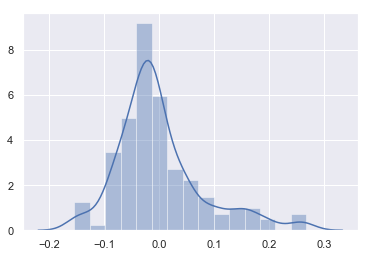

In [513]:
res = y_train-y_train_pred
sns.distplot(res)

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final.

#### Applying the scaling on the test sets

In [514]:
num_vars = ['symboling', 'carlength', 'carheight', 
         'enginesize', 'boreratio', 'stroke', 'compressionratio',
            'horsepower', 'peakrpm', 'citympg', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,mitsubishi,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
160,0.4,1,1,0,1,0.409756,0.460177,0.139623,0.404762,0.424242,...,0,0,0,0,0,0,0,1,0,0
186,0.8,1,1,0,1,0.497561,0.699115,0.181132,0.404762,0.611111,...,0,0,0,0,0,0,0,0,1,0
59,0.6,1,1,1,1,0.596748,0.522124,0.230189,0.563492,0.606061,...,0,0,0,0,0,0,0,0,0,0
165,0.6,1,1,1,1,0.448780,0.424779,0.139623,0.444444,0.449495,...,0,0,0,0,0,0,0,1,0,0
140,0.8,1,1,1,1,0.263415,0.699115,0.177358,0.746032,0.227273,...,0,0,0,0,0,0,1,0,0,0


#### Dividing into X_test and y_test

In [515]:
y_test = df_test.pop('price')
X_test = df_test

In [516]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,...,mitsubishi,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
160,1.0,0.4,1,1,0,1,0.409756,0.460177,0.139623,0.404762,...,0,0,0,0,0,0,0,1,0,0
186,1.0,0.8,1,1,0,1,0.497561,0.699115,0.181132,0.404762,...,0,0,0,0,0,0,0,0,1,0
59,1.0,0.6,1,1,1,1,0.596748,0.522124,0.230189,0.563492,...,0,0,0,0,0,0,0,0,0,0
165,1.0,0.6,1,1,1,1,0.448780,0.424779,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
140,1.0,0.8,1,1,1,1,0.263415,0.699115,0.177358,0.746032,...,0,0,0,0,0,0,1,0,0,0


In [517]:
X_test_sm = X_test_sm.drop(['compressionratio', 'enginelocation', 'mfi', 'spfi', 'mercury', 
                            'subaru', 'Nissan', '4bbl', 'isuzu', 'citympg', 'idi', 'mpfi',
                            'spdi', '4wd', 'renault', 'fueltype', 'horsepower', 'hardtop', 
                            'rwd', 'fwd', '1bbl', '2bbl', 'ohcf', 'honda', 'symboling',
                            'hatchback', 'sedan', 'wagon', 'four', 'twelve', 'ohc', 'peugeot',
                            'chevrolet', 'five', 'three', 'ohcv', 'stroke', 'peakrpm','aspiration',
                            'six', 'mazda', 'dodge', 'dohcv', 'plymouth', 'eight', 'alfa', 
                            'doornumber', 'volkswagen', 'mitsubishi','carheight', 'dohc', 'toyota', 
                            'boreratio', 'l', 'two', 'rotor', 'convertible', 'saab', 'carlength', 'jaguar'], axis = 1)

### Make Prediction

In [518]:
y_test_pred =lr_model.predict(X_test_sm)

In [519]:
# evaluate
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8946811845535383

Text(0, 0.5, 'y_pred')

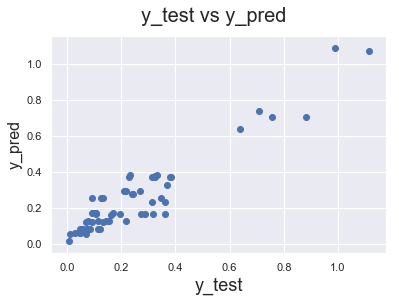

In [521]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

### Conclusion

- 1. The R square and Adjusted R square value in CarModelWithOutliers is almost same which is 86.4% and 85.8% respectively which indicates that none of the parameters in CarModelWithOutliers model are reduntant.

- 2. As we can see that the model seems to be stable, The variables that can affect price are:

    1 enginesize
    2 buick
    3 volvo
    4 porsche 
    5 bmw 
    6 two
    7 audi